In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np 

An Electro Cardio Gram (ECG) is simple test that can be used to check your heart rhythm and electrical activity.

Classes = [N:0, S:1, V:2, F:3, Q:4] N: Non-ecotic beats (Normal Beats), - S: Supraventricular ectopic beats , V - Ventricular ectopic beats, F - Fusion Beats , Q - Unknown Beats

In [ ]:
train_data = pd.read_csv('/content/drive/MyDrive/DL - NLP - 17-02/ECG/mitbih_train.csv', header=None)
test_data = pd.read_csv('/content/drive/MyDrive/DL - NLP - 17-02/ECG/mitbih_test.csv', header=None) 

In [ ]:
train_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,0.044118,0.061275,0.066176,0.061275,0.049020,0.073529,0.061275,0.061275,0.066176,0.068627,0.095588,0.075980,0.093137,0.105392,0.115196,0.102941,0.117647,0.125000,0.142157,0.127451,0.151961,0.144608,0.164216,0.144608,0.159314,0.151961,0.154412,0.142157,0.151961,0.151961,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,0.074074,0.062678,0.065527,0.065527,0.062678,0.076923,0.071225,0.082621,0.091168,0.096866,0.082621,0.082621,0.091168,0.105413,0.122507,0.148148,0.182336,0.193732,0.213675,0.207977,0.222222,0.253561,0.270655,0.287749,0.284900,0.293447,0.256410,0.247863,0.188034,0.145299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,0.056757,0.043243,0.067568,0.062162,0.078378,0.072973,0.086486,0.081081,0.108108,0.110811,0.135135,0.135135,0.170270,0.183784,0.216216,0.237838,0.270270,0.286486,0.316216,0.318919,0.332432,0.297297,0.267568,0.216216,0.189189,0.132432,0.118919,0.064865,0.064865,0.043243,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,0.063536,0.082873,0.085635,0.093923,0.113260,0.124309,0.140884,0.132597,0.140884,0.091160,0.085635,0.074586,0.071823,0.080110,0.096685,0.118785,0.138122,0.140884,0.138122,0.146409,0.110497,0.102210,0.060773,0.027624,0.038674,0.013812,0.011050,0.013812,0.033149,0.005525,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,0.131455,0.122066,0.140845,0.159624,0.150235,0.145540,0.136150,0.169014,0.178404,0.173709,0.183099,0.201878,0.187793,0.164319,0.187793,0.215962,0.215962,0.201878,0.211268,0.230047,0.215962,0.230047,0.239437,0.267606,0.253521,0.230047,0.220657,0.225352,0.211268,0.173709,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87549,0.807018,0.494737,0.536842,0.529825,0.491228,0.484211,0.456140,0.396491,0.284211,0.136842,0.052632,0.140351,0.119298,0.091228,0.140351,0.161404,0.105263,0.143860,0.143860,0.129825,0.147368,0.157895,0.164912,0.168421,0.154386,0.175439,0.164912,0.154386,0.182456,0.192982,0.196491,0.207018,0.217544,0.217544,0.256140,0.284211,0.294737,0.301754,0.301754,0.322807,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87550,0.718333,0.605000,0.486667,0.361667,0.231667,0.120000,0.051667,0.001667,0.000000,0.013333,0.078333,0.183333,0.275000,0.315000,0.361667,0.430000,0.481667,0.526667,0.543333,0.563333,0.581667,0.588333,0.600000,0.603333,0.613333,0.6216

**Data Manipulation**

In [ ]:
train_data.isnull().sum()

0      0
1      0
2      0
3      0
4      0
      ..
183    0
184    0
185    0
186    0
187    0
Length: 188, dtype: int64

In [ ]:
train_data[187].unique()

array([0., 1., 2., 3., 4.])

In [ ]:
# 187th column is target column
# Typecasting 187th column from float to integer
train_data[187] = train_data[187].astype('int')

**EDA**

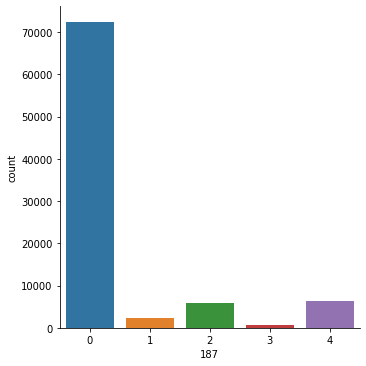

In [ ]:
sns.catplot(x = 187, kind = 'count', data = train_data)

In [ ]:
train_data[187].value_counts()

0    72471
4     6431
2     5788
1     2223
3      641
Name: 187, dtype: int64

**Show Normal Heartbeats**

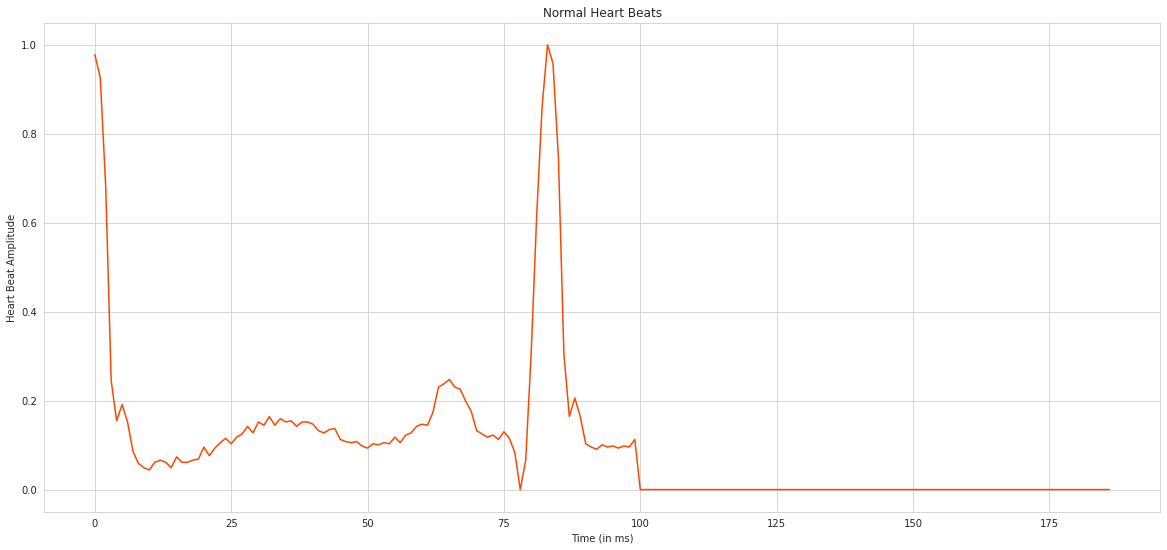

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(20,9))
plt.plot(train_data.iloc[0, 0:187], color = 'orangered')
plt.xlabel("Time (in ms)")
plt.ylabel("Heart Beat Amplitude")
plt.title("Normal Heart Beats", fontsize = 12)
plt.show()

In [ ]:
# Slicing the dataset into seperate classes
df_1 = train_data[ train_data[187] == 1 ]
df_2 = train_data[ train_data[187] == 2 ]
df_3 = train_data[ train_data[187] == 3 ]
df_4 = train_data[ train_data[187] == 4 ]

In [ ]:
df_1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187
72471,1.000000,0.666667,0.100457,0.036530,0.073059,0.050228,0.018265,0.105023,0.132420,0.091324,0.118721,0.182648,0.242009,0.264840,0.255708,0.260274,0.264840,0.255708,0.278539,0.292237,0.287671,0.269406,0.287671,0.296804,0.305936,0.305936,0.333333,0.356164,0.365297,0.365297,0.401826,0.438356,0.484018,0.488584,0.529680,0.570776,0.552511,0.538813,0.520548,0.506849,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1
72472,0.983696,1.000000,0.331522,0.000000,0.108696,0.163043,0.130435,0.190217,0.288043,0.222826,0.179348,0.271739,0.402174,0.423913,0.396739,0.418478,0.445652,0.440217,0.434783,0.434783,0.440217,0.440217,0.451087,0.461957,0.489130,0.478261,0.461957,0.505435,0.548913,0.559783,0.592391,0.652174,0.684783,0.668478,0.663043,0.722826,0.717391,0.679348,0.657609,0.630435,...,0.456522,0.434783,0.418478,0.423913,0.440217,0.456522,0.429348,0.434783,0.456522,0.440217,0.429348,0.440217,0.440217,0.451087,0.434783,0.445652,0.434783,0.429348,0.407609,0.445652,0.440217,0.451087,0.434783,0.429348,0.434783,0.429348,0.413043,0.440217,0.456522,0.483696,0.461957,0.483696,0.500000,0.494565,0.510870,0.51087,0.505435,0.472826,0.434783,1
72473,1.000000,0.911504,0.216814,0.000000,0.101770,0.199115,0.176991,0.194690,0.252212,0.238938,0.216814,0.283186,0.384956,0.398230,0.393805,0.384956,0.402655,0.402655,0.398230,0.380531,0.398230,0.415929,0.420354,0.407080,0.420354,0.460177,0.469027,0.442478,0.500000,0.548673,0.539823,0.575221,0.615044,0.610619,0.641593,0.659292,0.637168,0.601770,0.579646,0.513274,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1
72474,0.090498,0.126697,0.217195,0.361991,0.461538,0.556561,0.443439,0.434389,0.452489,0.511312,0.497738,0.502262,0.366516,0.253394,0.167421,0.122172,0.054299,0.054299,0.031674,0.022624,0.004525,0.009050,0.000000,0.009050,0.009050,0.022624,0.022624,0.036199,0.031674,0.049774,0.049774,0.067873,0.063348,0.072398,0.095023,0.126697,0.117647,0.149321,0.171946,0.208145,...,0.058824,0.090498,0.149321,0.248869,0.479638,0.769231,0.968326,1.000000,0.583710,0.221719,0.099548,0.113122,0.090498,0.063348,0.049774,0.049774,0.040724,0.045249,0.022624,0.040724,0.031674,0.036199,0.036199,0.058824,0.063348,0.072398,0.072398,0.095023,0.090498,0.113122,0.122172,0.131222,0.140271,0.158371,0.176471,0.20362,0.212670,0.000000,0.000000,1
72475,0.961111,1.000000,0.551852,0.101852,0.040741,0.085185,0.094444,0.088889,0.085185,0.070370,0.070370,0.074074,0.072222,0.066667,0.062963,0.061111,0.051852,0.046296,0.044444,0.044444,0.029630,0.020370,0.024074,0.018519,0.009259,0.003704,0.007407,0.009259,0.014815,0.024074,0.040741,0.059259,0.075926,0.094444,0.114815,0.127778,0.127778,0.120370,0.124074,0.131481,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

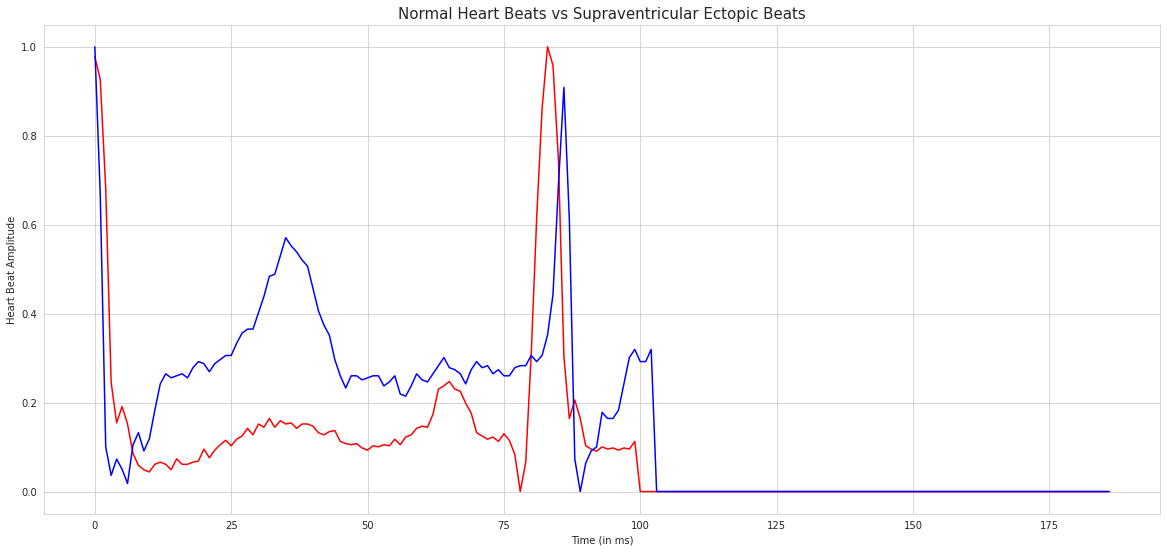

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(20,9))
plt.plot(train_data.iloc[0, 0:187], color = 'red', label = 'Normal Heartbeats')
plt.plot(df_1.iloc[0, 0:187], color = 'blue', label = 'Supraventricular ectopic beats')
plt.xlabel("Time (in ms)")
plt.ylabel("Heart Beat Amplitude")
plt.title("Normal Heart Beats vs Supraventricular Ectopic Beats", fontsize = 15)
plt.show() 

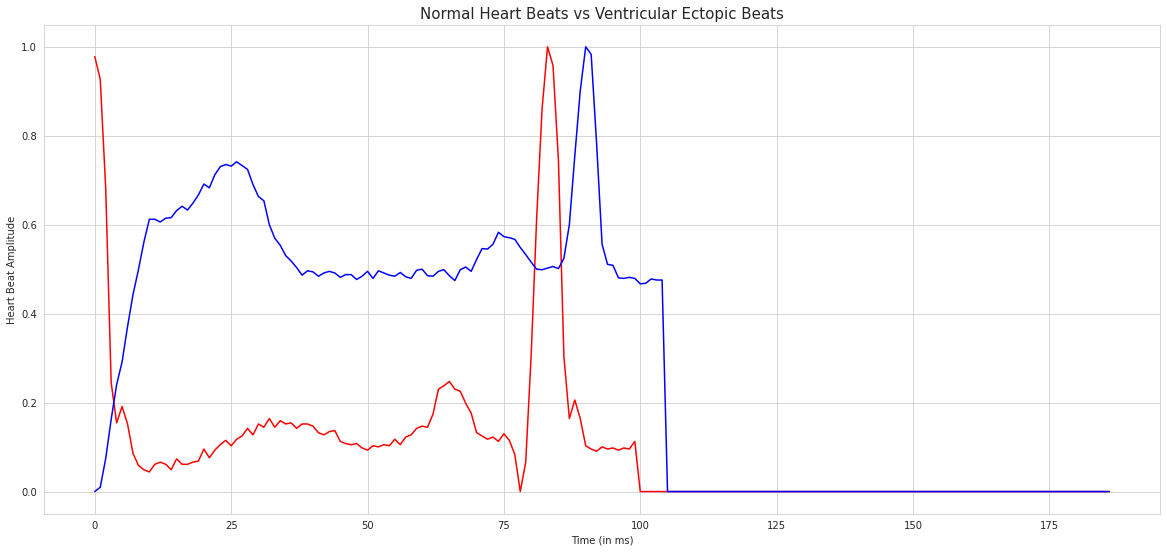

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(20,9))
plt.plot(train_data.iloc[0, 0:187], color = 'red', label = 'Normal Heartbeats')
plt.plot(df_2.iloc[0, 0:187], color = 'blue', label = 'Supraventricular ectopic beats')
plt.xlabel("Time (in ms)")
plt.ylabel("Heart Beat Amplitude")
plt.title("Normal Heart Beats vs Ventricular Ectopic Beats", fontsize = 15)
plt.show()

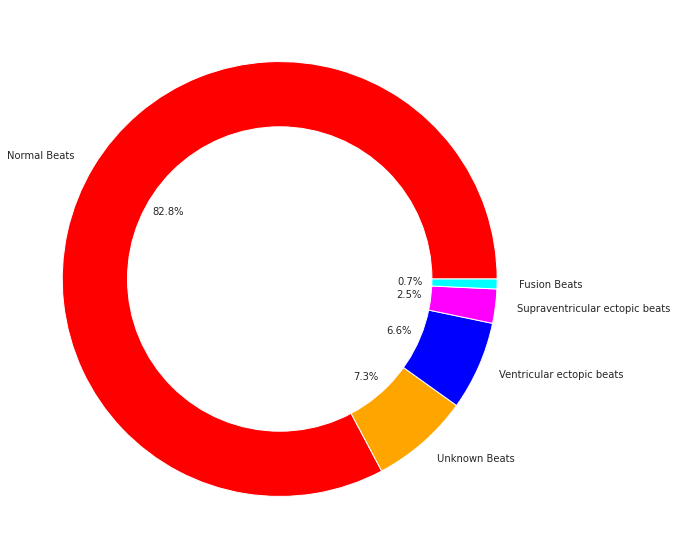

In [ ]:
plt.figure(figsize = (10,10))
my_circle = plt.Circle((0,0), 0.7, color = 'white')

plt.pie(train_data[187].value_counts(), labels = ['Normal Beats','Unknown Beats','Ventricular ectopic beats', 'Supraventricular ectopic beats',
                                                  'Fusion Beats'], autopct = '%1.1f%%', colors =  ['red', 'orange', 'blue', 'magenta', 'cyan'])
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

**Data Augmentation**

In [ ]:
from sklearn.utils import resample
# reshuffling the attributes value & renegerating - 
# random_state is just like seed to fix the random sampling of data, regenerate new samples 
# Increased the no of samples to 20000
df_1_upsample = resample(df_1, n_samples = 20000, replace = True, random_state = 123)
df_2_upsample = resample(df_2, n_samples = 20000, replace = True, random_state = 123)
df_3_upsample = resample(df_3, n_samples = 20000, replace = True, random_state = 123)
df_4_upsample = resample(df_4, n_samples = 20000, replace = True, random_state = 123)

In [ ]:
df_0 = train_data[train_data[187] == 0].sample(n = 20000, random_state = 123)

In [ ]:
# Merge & Concat all DataFrames 
train_df = pd.concat([df_0, df_1_upsample, df_2_upsample, df_3_upsample, df_4_upsample])
train_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187
14967,1.000000,0.647702,0.039387,0.004376,0.102845,0.063457,0.067834,0.048140,0.045952,0.045952,0.039387,0.037199,0.043764,0.043764,0.050328,0.048140,0.048140,0.054705,0.063457,0.059081,0.080963,0.087527,0.107221,0.120350,0.140044,0.157549,0.181619,0.196937,0.218818,0.227571,0.256018,0.260394,0.260394,0.256018,0.247265,0.223195,0.205689,0.175055,0.157549,0.142232,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
71482,1.000000,0.946619,0.651246,0.330961,0.000000,0.067616,0.092527,0.163701,0.192171,0.177936,0.181495,0.170819,0.163701,0.170819,0.153025,0.153025,0.138790,0.142349,0.142349,0.145907,0.135231,0.138790,0.145907,0.156584,0.156584,0.163701,0.160142,0.181495,0.181495,0.195730,0.224199,0.231317,0.238434,0.252669,0.263345,0.277580,0.288256,0.306050,0.302491,0.330961,...,0.131673,0.174377,0.185053,0.185053,0.174377,0.185053,0.185053,0.181495,0.16726,0.170819,0.145907,0.156584,0.153025,0.16726,0.160142,0.160142,0.163701,0.170819,0.16726,0.177936,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
23543,1.000000,0.855967,0.302469,0.041152,0.185185,0.160494,0.098765,0.092593,0.109053,0.088477,0.076132,0.084362,0.092593,0.074074,0.076132,0.076132,0.082305,0.080247,0.078189,0.082305,0.094650,0.092593,0.086420,0.106996,0.117284,0.119342,0.121399,0.144033,0.158436,0.170782,0.179012,0.207819,0.232510,0.240741,0.255144,0.281893,0.300412,0.302469,0.302469,0.308642,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9174,1.000000,0.838806,0.738806,0.641791,0.604478,0.583582,0.580597,0.580597,0.591045,0.577612,0.571642,0.540299,0.519403,0.511940,0.520896,0.504478,0.491045,0.462687,0.449254,0.428358,0.423881,0.449254,0.477612,0.528358,0.555224,0.570149,0.610448,0.638806,0.668657,0.686567,0.702985,0.713433,0.702985,0.676119,0.670149,0.653731,0.635821,0.625373,0.594030,0.588060,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
42319,1.000000,0.720257,0.019293,0.106109,0.073955,0.086817,0.070740,0.077170,0.070740,0.083601,0.057878,0.077170,0.064309,0.083601,0.073955,0.080386,0.073955,0.083601,0.070740,0.077170,0.070740,0.083601,0.067524,0.080386,0.067524,0.080386,0.061093,0.067524,0.051447,0.061093,0.057878,0.073955,0.067524,0.093248,0.099678,0.135048,0.135048,0.163987,0.154341,0.163987,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86326,0.979769,0.765896,0.820809,0.274566,0.170520,0.150289,0.150289,0.147399,0.135838,0.130058,0.124277,0.118497,0.112717,0.104046,0.101156,0.083815,0.083815,0.069364,0.066474,0.057803,0.054913,0.037572,0.031792,0.028902,0.017341,0.017341,0.011561,0.000000,0.008671,0.0057

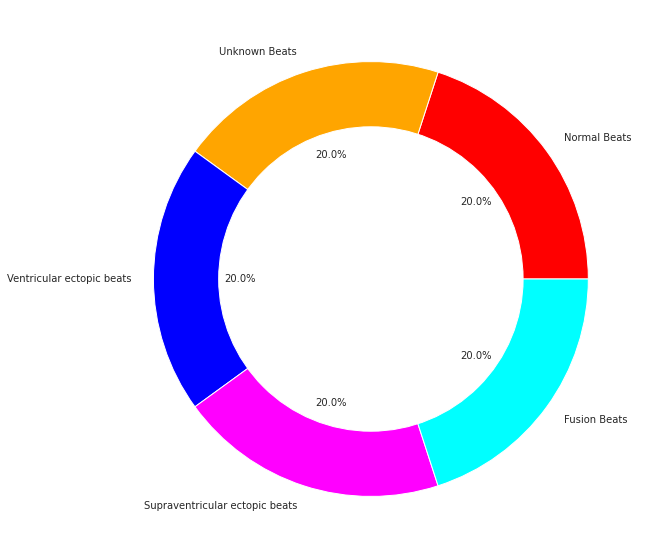

In [ ]:
plt.figure(figsize = (10,10))
my_circle = plt.Circle((0,0), 0.7, color = 'white')

plt.pie(train_df[187].value_counts(), labels = ['Normal Beats','Unknown Beats','Ventricular ectopic beats', 'Supraventricular ectopic beats',
                                                  'Fusion Beats'], autopct = '%1.1f%%', colors =  ['red', 'orange', 'blue', 'magenta', 'cyan'])
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [ ]:
train_df.shape

(100000, 188)

**Multi-Class Classification**

In [ ]:
test_data[187] = test_data[187].astype('int') 
train_target = train_df[187]
test_target = test_data[187] 

In [ ]:
test_target.unique() 

array([0, 1, 2, 3, 4])

In [ ]:
# label Encoding
from keras.utils.np_utils import to_categorical
y_train = to_categorical(train_target)

In [ ]:
y_train

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [ ]:
y_test = to_categorical(test_target)

In [ ]:
X_train = train_df .iloc[:, :-1].values
X_test = test_data.iloc[:, :-1].values

**ANN Classification**

In [ ]:
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import Adam

In [ ]:
def build_model():
    model = Sequential()
    model.add(Dense(units = 64, activation= 'relu', input_shape = [187]))
    # Hidden Layer - I
    model.add(Dense(units = 128, activation= 'relu'))
    # Hidden Layer - II
    model.add(Dense(units = 256, activation= 'relu'))

    # Output Layer 
    # Linear Activation Function 
    # Multiclass classification - No of Neurons = No of classes
    model.add(Dense(units = 5, activation='softmax'))

    # Optimizer for classification - Adam, SGD
    optimizers = Adam(learning_rate= 0.001)
    
    # Loss for multi class - categorical_crossentrpy
    model.compile(loss = 'categorical_crossentropy', optimizer = optimizers, metrics = ['accuracy'])
    return model

In [ ]:
model = build_model()

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 64)                12032     
_________________________________________________________________
dense_9 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_10 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_11 (Dense)             (None, 5)                 1285      
Total params: 54,661
Trainable params: 54,661
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# validation_split = % of sample 0.15 - 0.20 
history = model.fit(X_train, y_train, epochs = 50, batch_size= 32, validation_data= (X_test, y_test))

Epoch 1/50
3125/3125 [==============================] - 8s 2ms/step - loss: 0.5329 - accuracy: 0.7976 - val_loss: 0.3173 - val_accuracy: 0.8712
Epoch 2/50
3125/3125 [==============================] - 7s 2ms/step - loss: 0.2097 - accuracy: 0.9212 - val_loss: 0.2658 - val_accuracy: 0.9011
Epoch 3/50
3125/3125 [==============================] - 7s 2ms/step - loss: 0.1443 - accuracy: 0.9492 - val_loss: 0.2855 - val_accuracy: 0.8965
Epoch 4/50
3125/3125 [==============================] - 7s 2ms/step - loss: 0.1124 - accuracy: 0.9591 - val_loss: 0.2468 - val_accuracy: 0.9179
Epoch 5/50
3125/3125 [==============================] - 7s 2ms/step - loss: 0.0908 - accuracy: 0.9687 - val_loss: 0.2320 - val_accuracy: 0.9218
Epoch 6/50
3125/3125 [==============================] - 7s 2ms/step - loss: 0.0808 - accuracy: 0.9722 - val_loss: 0.2152 - val_accuracy: 0.9301
Epoch 7/50
3125/3125 [==============================] - 7s 2ms/step - loss: 0.0697 - accuracy: 0.9761 - val_loss: 0.1749 - val_accuracy:

In [ ]:
# Model Evaluate 
model.evaluate(X_test, y_test)

685/685 [==============================] - 1s 1ms/step - loss: 0.2600 - accuracy: 0.9668


[0.26000529527664185, 0.9668372273445129]

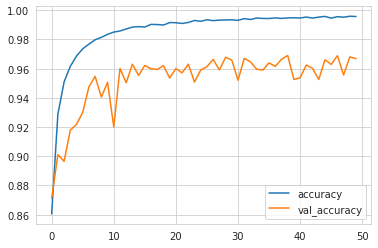

In [ ]:
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot() 

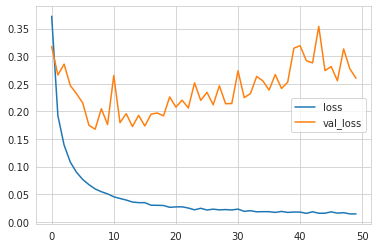

In [ ]:
pd.DataFrame(history.history)[['loss', 'val_loss']].plot() 

**Classification Metrics**

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report 

In [ ]:
prediction = model.predict(X_test) 

In [ ]:
prediction 

array([[1.0000000e+00, 1.6206621e-21, 1.6056088e-23, 1.0017196e-35,
        3.5965983e-28],
       [9.9999928e-01, 6.7756372e-07, 1.1895589e-09, 3.5820682e-13,
        2.2553301e-08],
       [9.9999428e-01, 5.7063080e-06, 3.1339108e-13, 9.7678437e-17,
        5.6491054e-22],
       ...,
       [3.0173714e-10, 1.6307740e-17, 9.7975844e-21, 2.2420610e-16,
        1.0000000e+00],
       [1.3866847e-15, 2.0002543e-25, 1.1565572e-21, 4.9223499e-27,
        1.0000000e+00],
       [4.2036423e-30, 0.0000000e+00, 3.7707075e-23, 0.0000000e+00,
        1.0000000e+00]], dtype=float32)

In [ ]:
yhat = np.argmax(prediction, axis = 1) 
yhat

array([0, 0, 0, ..., 4, 4, 4])

**Classification Metrics**

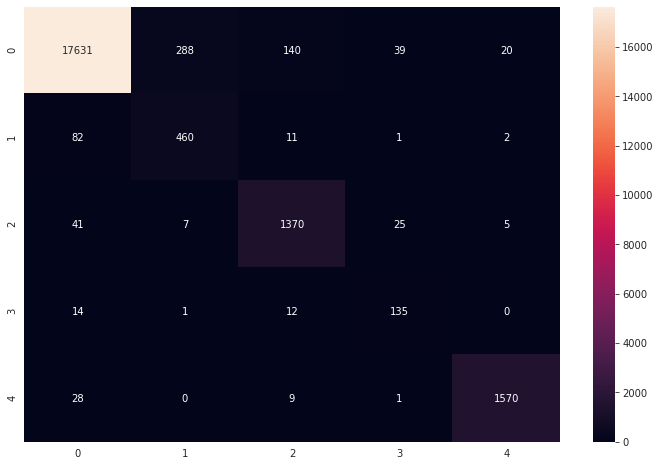

In [ ]:
# Confusion Matrix is matrix b/w True Predictions & False Predictions
plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix(np.argmax(y_test, axis = 1), yhat), annot=True, fmt = '0.0f')

In [ ]:
print(classification_report(np.argmax(y_test, axis = 1), yhat))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98     18118
           1       0.61      0.83      0.70       556
           2       0.89      0.95      0.92      1448
           3       0.67      0.83      0.74       162
           4       0.98      0.98      0.98      1608

    accuracy                           0.97     21892
   macro avg       0.83      0.91      0.86     21892
weighted avg       0.97      0.97      0.97     21892



**New Sample**

In [ ]:
# 20000th index value
X_test[20000]

In [ ]:
y_new = model.predict(X_test[20000].reshape(1,-1))
np.argmax(y_new)

2

In [ ]:
X_test[20000].reshape(1,-1)

array([[1.        , 0.96422487, 0.76149917, 0.49063033, 0.26746166,
        0.13287905, 0.06132879, 0.04770017, 0.0306644 , 0.03407155,
        0.05110732, 0.0528109 , 0.0528109 , 0.05962521, 0.06303237,
        0.0528109 , 0.05621806, 0.0528109 , 0.04429302, 0.03577513,
        0.0374787 , 0.02214651, 0.0153322 , 0.02044293, 0.0153322 ,
        0.        , 0.00340715, 0.01362862, 0.01362862, 0.01192504,
        0.02725724, 0.0306644 , 0.04429302, 0.04770017, 0.06643952,
        0.07666099, 0.09028961, 0.10902896, 0.12776831, 0.13969335,
        0.14821124, 0.17035775, 0.17546849, 0.1737649 , 0.19080068,
        0.19080068, 0.18228279, 0.17717206, 0.197615  , 0.18568996,
        0.18739353, 0.19080068, 0.19080068, 0.18909711, 0.19591141,
        0.2044293 , 0.20613287, 0.20102215, 0.20954004, 0.20102215,
        0.20102215, 0.19931857, 0.20613287, 0.20102215, 0.20613287,
        0.20783645, 0.21124361, 0.20783645, 0.20783645, 0.20954004,
        0.21124361, 0.20102215, 0.20613287, 0.21

In [ ]:
X_train.shape 

(100000, 187)

In [ ]:
X_test[2000].shape 

(187,)

In [ ]:
X_test[20000].reshape(1,-1).shape

(1, 187)